In [1]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [2]:
pip install eli5

In [3]:
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

Abhay Data

In [4]:
file = '/content/drive/MyDrive/Smita/Google Drive/Final_Smita Capstone/mobile_EDA_Data_Cleaning_Simple Imputation(2).csv'
social_df = pd.read_csv(file)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Abhay_without outlier treatment

In [6]:
social_df.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Adult_flag_1,working_flag_Yes,following_company_page_Yes
0,1,307.0,1.0,38570.0,1.0,2,9,94.0,5993.0,8,11.0,1,8.0,0,0,1
1,0,367.0,1.0,9765.0,1.0,1,9,61.0,5130.0,1,23.0,4,10.0,1,1,0
2,1,277.0,1.0,48055.0,1.0,2,6,92.0,2090.0,6,15.0,2,7.0,0,0,1
3,0,247.0,1.0,48720.0,1.0,4,9,56.0,2909.0,1,11.0,3,8.0,0,0,1
4,0,202.0,1.0,20685.0,1.0,1,7,40.0,3468.0,9,12.0,4,6.0,1,0,0


In [7]:
social_df.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Adult_flag_1,working_flag_Yes,following_company_page_Yes
0,1,307.0,1.0,38570.0,1.0,2,9,94.0,5993.0,8,11.0,1,8.0,0,0,1
1,0,367.0,1.0,9765.0,1.0,1,9,61.0,5130.0,1,23.0,4,10.0,1,1,0
2,1,277.0,1.0,48055.0,1.0,2,6,92.0,2090.0,6,15.0,2,7.0,0,0,1
3,0,247.0,1.0,48720.0,1.0,4,9,56.0,2909.0,1,11.0,3,8.0,0,0,1
4,0,202.0,1.0,20685.0,1.0,1,7,40.0,3468.0,9,12.0,4,6.0,1,0,0


In [8]:
social_df.shape

(10652, 16)

In [9]:
social_df = social_df.drop("preferred_device", axis=1)

In [10]:
X = social_df.drop('Taken_product', axis=1)

y = social_df.pop("Taken_product")

X.head()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Daily_Avg_mins_spend_on_traveling_page,Adult_flag_1,working_flag_Yes,following_company_page_Yes
0,307.0,38570.0,1.0,2,9,94.0,5993.0,8,11.0,1,8.0,0,0,1
1,367.0,9765.0,1.0,1,9,61.0,5130.0,1,23.0,4,10.0,1,1,0
2,277.0,48055.0,1.0,2,6,92.0,2090.0,6,15.0,2,7.0,0,0,1
3,247.0,48720.0,1.0,4,9,56.0,2909.0,1,11.0,3,8.0,0,0,1
4,202.0,20685.0,1.0,1,7,40.0,3468.0,9,12.0,4,6.0,1,0,0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

## 1) Applying Grid Search on Extreme Gradient Boosting Machine (XG-Boost)

In [12]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV



colsample_bylevel=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
colsample_bynode=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
colsample_bytree=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma= [int(x) for x in np.linspace(0.1, 5,20)]
learning_rate=[int(x) for x in np.linspace(0.001, 1,30)]
max_depth=[2,3,4,5,6,7,8,9,10,11,12,13,15]
min_child_weight=[int(x) for x in np.linspace(0.1, 5,20)]
n_estimators=[50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900] 
random_state=7,
reg_alpha=[int(x) for x in np.linspace(0.1, 5,20)]
reg_lambda=[int(x) for x in np.linspace(0.1, 5,20)]
subsample=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1] 

random_grid = {
            'colsample_bylevel':colsample_bylevel,
            'colsample_bynode':colsample_bynode,
            'colsample_bytree':colsample_bytree,
            'gamma':gamma,
            'learning_rate':learning_rate,
            'max_depth':max_depth,
            'min_child_weight':min_child_weight,
            'n_estimators':n_estimators,
            'random_state':random_state,
            'reg_alpha':reg_alpha,
            'reg_lambda':reg_lambda,
            'subsample':subsample
}


In [13]:
xgb=XGBClassifier()
xgb_randomcv=RandomizedSearchCV(estimator=xgb,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=7,n_jobs=-1)
### fit the randomized model
xgb_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                   

In [14]:
xgb_randomcv.best_params_

{'colsample_bylevel': 0.1,
 'colsample_bynode': 0.9,
 'colsample_bytree': 0.8,
 'gamma': 2,
 'learning_rate': 1,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 750,
 'random_state': 7,
 'reg_alpha': 2,
 'reg_lambda': 5,
 'subsample': 1}

In [15]:
best_random_grid=xgb_randomcv.best_estimator_

In [16]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [17]:
y_pred=best_random_grid.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_train,y_pred)))
print("Classification report: {}".format(classification_report(y_train,y_pred)))

[[6322    8]
 [  56 1070]]
Accuracy Score 0.9914163090128756
Classification report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      6330
           1       0.99      0.95      0.97      1126

    accuracy                           0.99      7456
   macro avg       0.99      0.97      0.98      7456
weighted avg       0.99      0.99      0.99      7456



In [18]:
from sklearn.metrics import accuracy_score
y_predb=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_predb))
print("Accuracy Score {}".format(accuracy_score(y_test,y_predb)))
print("Classification report: {}".format(classification_report(y_test,y_predb)))

[[2678   24]
 [ 111  383]]
Accuracy Score 0.9577596996245307
Classification report:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      2702
           1       0.94      0.78      0.85       494

    accuracy                           0.96      3196
   macro avg       0.95      0.88      0.91      3196
weighted avg       0.96      0.96      0.96      3196



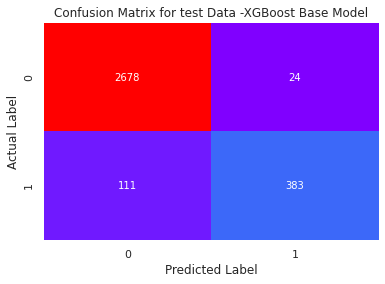

In [19]:
confusion_matrix(y_test,y_predb)
sns.heatmap(confusion_matrix(y_test,y_predb),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test Data -XGBoost Base Model')
plt.show()

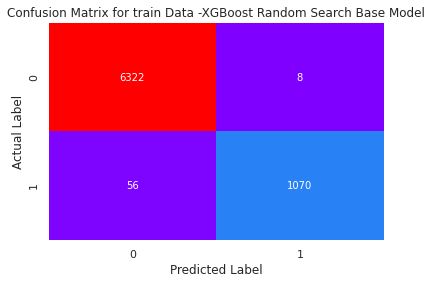

In [20]:
confusion_matrix(y_train,y_pred)
sns.heatmap(confusion_matrix(y_train,y_pred),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train Data -XGBoost Random Search Base Model')
plt.show()

In [21]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

No handles with labels found to put in legend.


AUC: 0.986


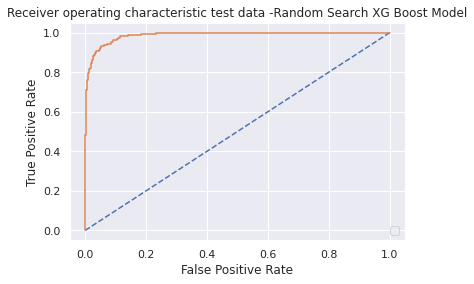

In [22]:
# predict probabilities
probs = best_random_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr,test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -Random Search XG Boost Model')
plt.legend(loc="lower right")
plt.savefig('XGB Random searh Model_ROC')
plt.show()

No handles with labels found to put in legend.


AUC: 0.999


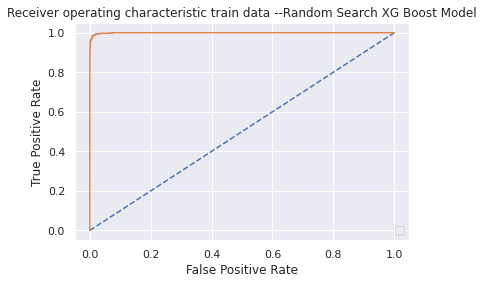

In [23]:
# predict probabilities
probs = best_random_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data --Random Search XG Boost Model')
plt.legend(loc="lower right")
plt.savefig('XGB Random searh Model_ROC')
plt.show()

Manual search

In [26]:
# Best XG boost Model for mobile (After Hyperparameter Tuning)

In [27]:
clfXGB1=XGBClassifier(n_estimators=950,learning_rate=0.42, max_depth=7, gamma=4,Subsample = 5, colsample_bytree = 0.5, min_child_weight = 6.5, reg_alpha=0.01, reg_lambda=5, colsample_bynode = .8, colsample_bylevel=0.6, random_state=7)
clfXGB1.fit(X_train, y_train)
y_pred2=clfXGB1.predict(X_train)
model_scoreXGB=clfXGB1.score(X_train,y_train)
print(model_scoreXGB)
print(confusion_matrix(y_train,y_pred2))
print(classification_report(y_train, y_pred2))

0.9916845493562232
[[6327    3]
 [  59 1067]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6330
           1       1.00      0.95      0.97      1126

    accuracy                           0.99      7456
   macro avg       0.99      0.97      0.98      7456
weighted avg       0.99      0.99      0.99      7456



In [28]:
# clfXGB1=XGBClassifier(n_estimators=1000,learning_rate=0.12, max_depth=7, gamma=4,Subsample = 5,colsample_bytree = 0.5, min_child_weight = 6.5, reg_alpha=0.01, reg_lambda=3.5, colsample_bynode = .8, colsample_bylevel=0.6, random_state=7)
clfXGB1.fit(X_test, y_test)
y_pred1=clfXGB1.predict(X_test)
model_scoreXGB=clfXGB1.score(X_test,y_test)
print(model_scoreXGB)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test, y_pred1))

0.9699624530663329
[[2694    8]
 [  88  406]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2702
           1       0.98      0.82      0.89       494

    accuracy                           0.97      3196
   macro avg       0.97      0.91      0.94      3196
weighted avg       0.97      0.97      0.97      3196



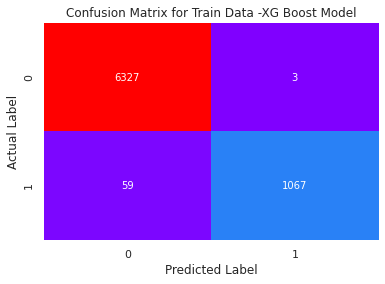

In [29]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,y_pred2)
sns.heatmap(confusion_matrix(y_train,y_pred2),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Train Data -XG Boost Model')
plt.show()

In [30]:
 from sklearn.metrics import roc_auc_score
 from sklearn import metrics
 from sklearn.metrics import roc_curve
from sklearn.metrics import auc

No handles with labels found to put in legend.


AUC: 0.933


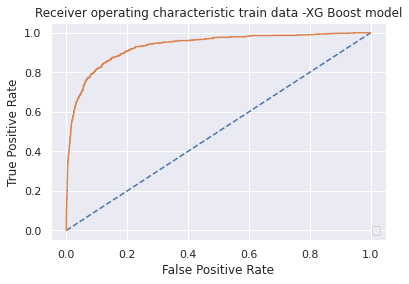

In [31]:
# predict probabilities
probs = clfXGB1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -XG Boost model')
plt.legend(loc="lower right")
plt.savefig('XGBoost Model train data  -ROC')
plt.show()

No handles with labels found to put in legend.


AUC: 0.994


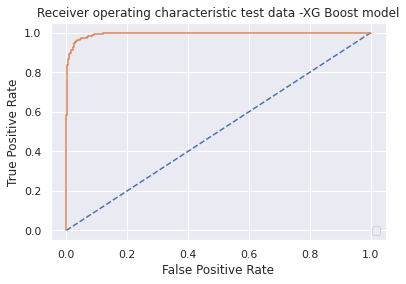

In [32]:
# predict probabilities
probs = clfXGB1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -XG Boost model')
plt.legend(loc="lower right")
plt.savefig('XG Boost Model test data _ROC')
plt.show()

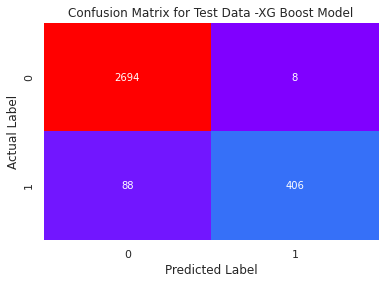

In [33]:
# Get the confusion matrix on the test data
confusion_matrix(y_test,y_pred1)
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Test Data -XG Boost Model')
plt.show()

In [34]:
print (pd.DataFrame(clfXGB1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
following_company_page_Yes                    20.441145
Adult_flag_1                                  13.751644
total_likes_on_outofstation_checkin_received   8.724780
preferred_location_type                        6.535361
total_likes_on_outstation_checkin_given        6.476807
Yearly_avg_view_on_travel_page                 6.381778
Daily_Avg_mins_spend_on_traveling_page         6.284393
working_flag_Yes                               6.079993
yearly_avg_Outstation_checkins                 5.635636
travelling_network_rating                      5.005384
week_since_last_outstation_checkin             4.421579
Yearly_avg_comment_on_travel_page              4.161209
member_in_family                               3.457523
montly_avg_comment_on_company_page             2.642761


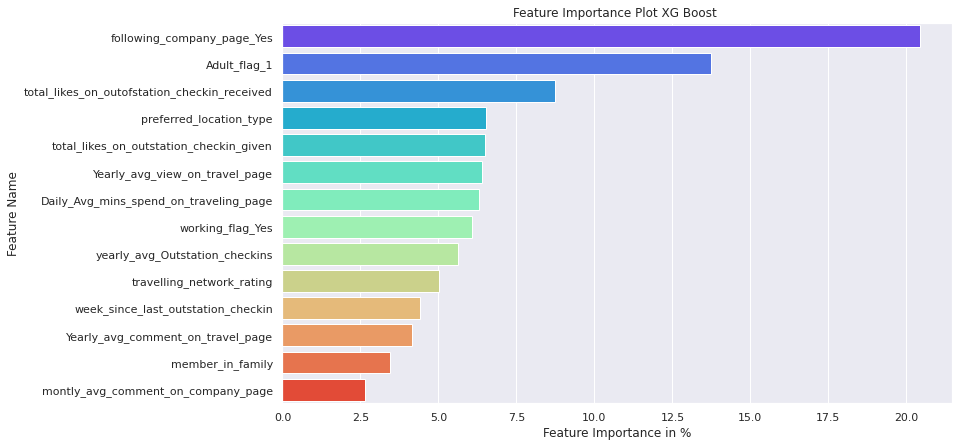

In [35]:
x=pd.DataFrame(clfXGB1.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot XG Boost ')
plt.show()

## Bagging

In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
import sklearn.metrics as metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Lasso

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
bgcl = BaggingClassifier( n_estimators=500, random_state=7, bootstrap_features=True, base_estimator= GradientBoostingClassifier(n_estimators=100, random_state=1, max_depth=9, learning_rate=9, ccp_alpha=0.0009))


bgcl = bgcl.fit(X_train, y_train)

In [39]:
y_pred_train=bgcl.predict(X_train)
model_scoreXGB=bgcl.score(X_train,y_train)
print(model_scoreXGB)
print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train, y_pred_train))

0.13680257510729613
[[  44 6286]
 [ 150  976]]
              precision    recall  f1-score   support

           0       0.23      0.01      0.01      6330
           1       0.13      0.87      0.23      1126

    accuracy                           0.14      7456
   macro avg       0.18      0.44      0.12      7456
weighted avg       0.21      0.14      0.05      7456



In [40]:
y_pred_test=bgcl.predict(X_test)
print(confusion_matrix(y_test,y_pred_test))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_test)))
print("Classification report: {}".format(classification_report(y_test,y_pred_test)))

[[  19 2683]
 [  68  426]]
Accuracy Score 0.13923654568210264
Classification report:               precision    recall  f1-score   support

           0       0.22      0.01      0.01      2702
           1       0.14      0.86      0.24       494

    accuracy                           0.14      3196
   macro avg       0.18      0.43      0.13      3196
weighted avg       0.21      0.14      0.05      3196



In [41]:
y_pred_train=bgcl.predict(X_train)

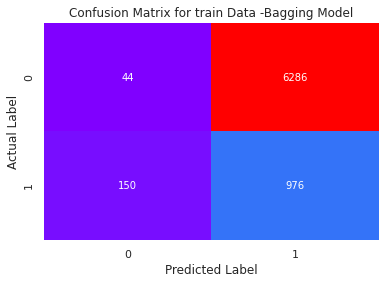

In [42]:
confusion_matrix(y_train,y_pred_train)
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train Data -Bagging Model')
plt.show()

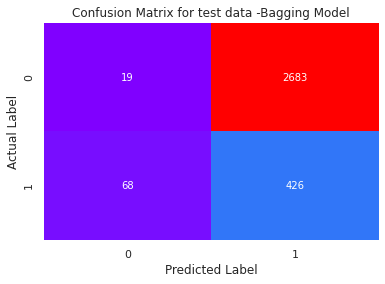

In [43]:
# Get the confusion matrix on the train data
confusion_matrix(y_test,y_pred_test)
sns.heatmap(confusion_matrix(y_test,y_pred_test),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test data -Bagging Model')
plt.show()

No handles with labels found to put in legend.


AUC: 0.228


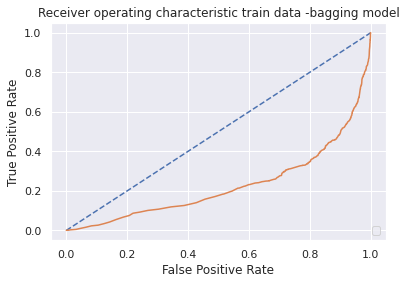

In [44]:
# predict probabilities
probs = bgcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -bagging model')
plt.legend(loc="lower right")
plt.savefig('Bagging -ROC')
plt.show()

No handles with labels found to put in legend.


AUC: 0.205


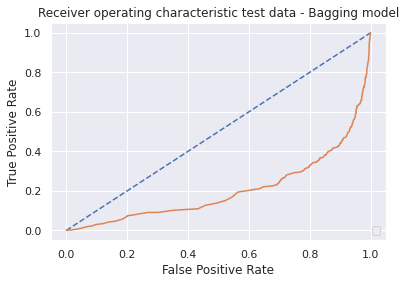

In [45]:
# predict probabilities
probs = bgcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data - Bagging model')
plt.legend(loc="lower right")
plt.savefig('Bagging Model_ROC')
plt.show()

## GradientBoosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
gbcl = GradientBoostingClassifier(n_estimators=200, random_state=7, max_depth=9, learning_rate=9, ccp_alpha=0.0009, subsample=1)
bgcl = gbcl.fit(X_train, y_train)

In [48]:
y_predict_train = gbcl.predict(X_train)
print(confusion_matrix(y_train,y_predict_train))
print(metrics.classification_report(y_train, y_predict_train, digits=2))

[[ 554 5776]
 [  87 1039]]
              precision    recall  f1-score   support

           0       0.86      0.09      0.16      6330
           1       0.15      0.92      0.26      1126

    accuracy                           0.21      7456
   macro avg       0.51      0.51      0.21      7456
weighted avg       0.76      0.21      0.17      7456



In [49]:
y_predict_test = gbcl.predict(X_test)
print(confusion_matrix(y_test,y_predict_test))
print(metrics.classification_report(y_test,y_predict_test, digits=2))

[[ 247 2455]
 [  31  463]]
              precision    recall  f1-score   support

           0       0.89      0.09      0.17      2702
           1       0.16      0.94      0.27       494

    accuracy                           0.22      3196
   macro avg       0.52      0.51      0.22      3196
weighted avg       0.78      0.22      0.18      3196



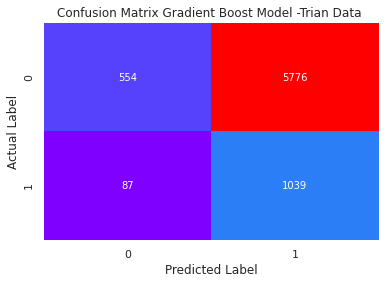

In [50]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,y_predict_train)
sns.heatmap(confusion_matrix(y_train,y_predict_train),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Gradient Boost Model -Trian Data ')
plt.show()

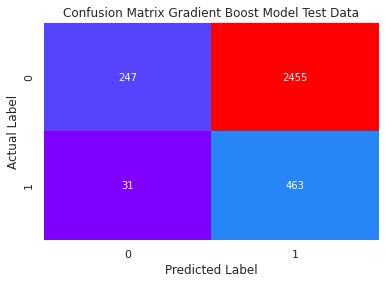

In [51]:
# Get the confusion matrix on the train data
confusion_matrix(y_test,y_predict_test)
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix Gradient Boost Model Test Data')
plt.show()

No handles with labels found to put in legend.


AUC: 0.505


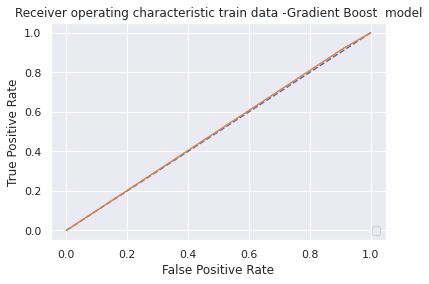

In [52]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Gradient Boost  model')
plt.legend(loc="lower right")
plt.savefig('Gradient Boost -ROC')
plt.show()

No handles with labels found to put in legend.


AUC: 0.514


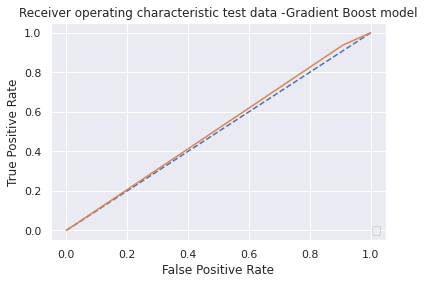

In [53]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data -Gradient Boost model')
plt.legend(loc="lower right")
plt.savefig('Gradient Boost_ROC')
plt.show()

In [54]:
print (pd.DataFrame(gbcl.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
preferred_location_type                       32.276380
total_likes_on_outofstation_checkin_received  27.995586
following_company_page_Yes                    14.346212
Adult_flag_1                                   7.982529
total_likes_on_outstation_checkin_given        7.729516
Yearly_avg_view_on_travel_page                 6.600597
yearly_avg_Outstation_checkins                 1.959681
week_since_last_outstation_checkin             1.093035
member_in_family                               0.010388
travelling_network_rating                      0.006076
Yearly_avg_comment_on_travel_page              0.000000
montly_avg_comment_on_company_page             0.000000
Daily_Avg_mins_spend_on_traveling_page         0.000000
working_flag_Yes                               0.000000


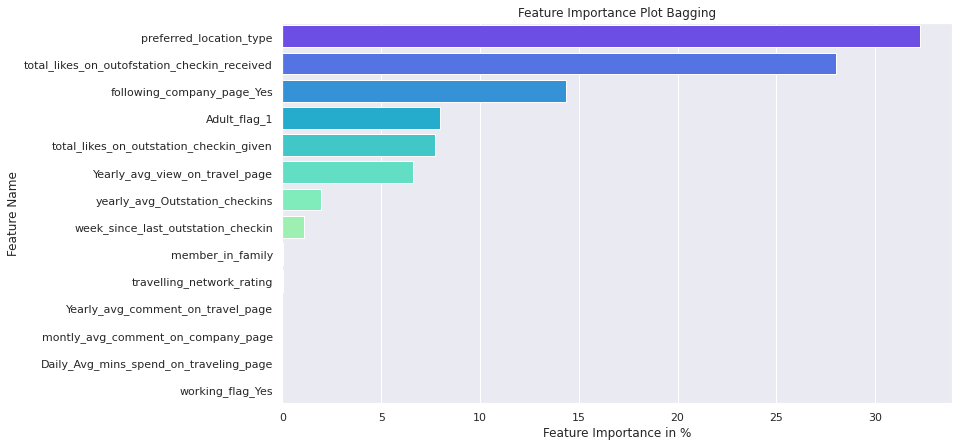

In [55]:
x=pd.DataFrame(gbcl.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot Bagging')
plt.show()

## LightGBM Model 


In [56]:
from lightgbm import LGBMClassifier

In [57]:
# LGBMClassifier?

In [58]:

lgbm = LGBMClassifier(max_depth=8, reg_alpha=0.5, reg_lambda=3, learning_rate=0.022, n_estimators=80, class_weight='balanced')
lgbm = lgbm.fit(X_train, y_train)

In [59]:
y_predict_train = lgbm.predict(X_train)
print(metrics.classification_report(y_train, y_predict_train, digits=2))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      6330
           1       0.55      0.92      0.69      1126

    accuracy                           0.87      7456
   macro avg       0.77      0.89      0.81      7456
weighted avg       0.92      0.87      0.89      7456



In [60]:
y_predict_test = lgbm.predict(X_test)
print(metrics.classification_report(y_test, y_predict_test,digits=2))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      2702
           1       0.53      0.89      0.66       494

    accuracy                           0.86      3196
   macro avg       0.75      0.87      0.79      3196
weighted avg       0.91      0.86      0.87      3196



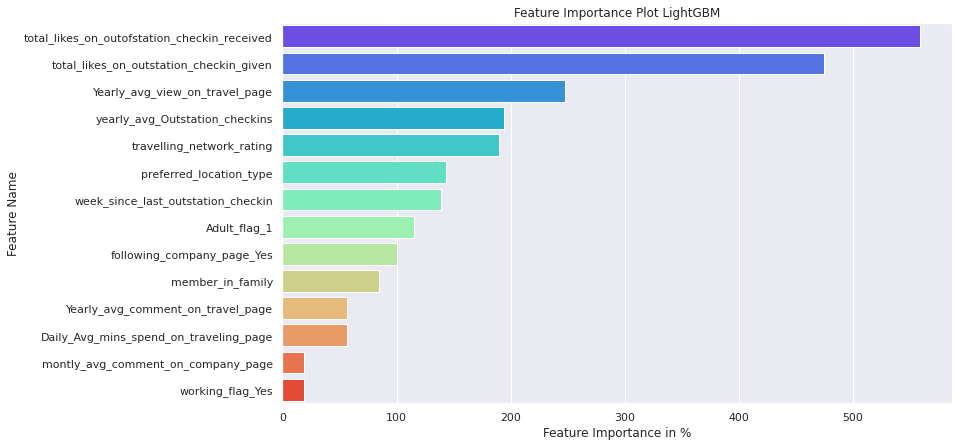

In [61]:
x=pd.DataFrame(lgbm.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot LightGBM')
plt.show()

In [62]:
pd.DataFrame(lgbm.feature_importances_,index=X_train.columns).sort_values(by=0,ascending=False)

,0
total_likes_on_outofstation_checkin_received,559
total_likes_on_outstation_checkin_given,475
Yearly_avg_view_on_travel_page,248
yearly_avg_Outstation_checkins,194
travelling_network_rating,190
preferred_location_type,143
week_since_last_outstation_checkin,139
Adult_flag_1,115
following_company_page_Yes,100
member_in_family,85


In [63]:
#Permutation Importance
perm = PermutationImportance(lgbm, scoring = 'accuracy' ,random_state=101).fit(X_test, y_test,)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0785 ± 0.0063,total_likes_on_outofstation_checkin_received
0.0763 ± 0.0072,following_company_page_Yes
0.0574 ± 0.0168,Adult_flag_1
0.0335 ± 0.0044,total_likes_on_outstation_checkin_given
0.0233 ± 0.0037,Yearly_avg_view_on_travel_page
0.0225 ± 0.0023,week_since_last_outstation_checkin
0.0164 ± 0.0060,yearly_avg_Outstation_checkins
0.0152 ± 0.0064,travelling_network_rating
0.0112 ± 0.0058,preferred_location_type
0.0087 ± 0.0016,member_in_family


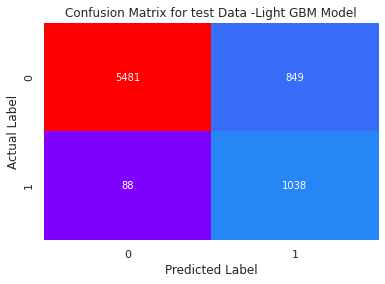

In [64]:
confusion_matrix(y_train,y_predict_train)
sns.heatmap(confusion_matrix(y_train,y_predict_train),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test Data -Light GBM Model')
plt.show()

No handles with labels found to put in legend.


AUC: 0.960


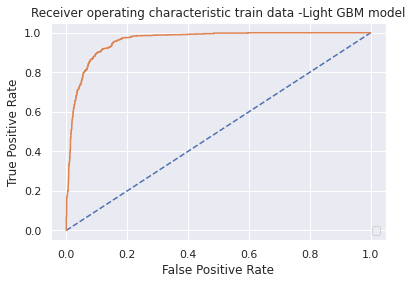

In [65]:
# predict probabilities
probs = lgbm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -Light GBM model')
plt.legend(loc="lower right")
plt.savefig('Light GBM Model -ROC')
plt.show()

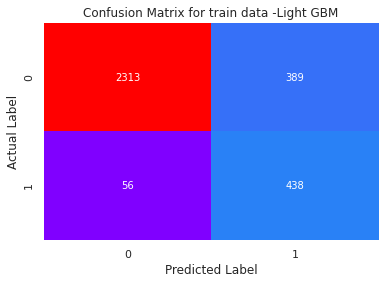

In [66]:
# Get the confusion matrix on the train data
confusion_matrix(y_test,y_predict_test)
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train data -Light GBM')
plt.show()

No handles with labels found to put in legend.


AUC: 0.942


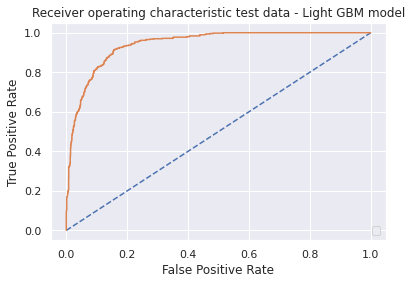

In [67]:
# predict probabilities
probs = lgbm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data - Light GBM model')
plt.legend(loc="lower right")
plt.savefig('Light GBM Model _ROC')
plt.show()

## KNN Model

In [68]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()

In [70]:
X_train = sc.fit_transform(X_train)

In [71]:
X_test = sc.transform(X_test)

In [72]:
KNN_model=KNeighborsClassifier(n_neighbors=3,p = 1.5)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1.5,
                     weights='uniform')

In [73]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9965128755364807
[[6323    7]
 [  19 1107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       0.99      0.98      0.99      1126

    accuracy                           1.00      7456
   macro avg       1.00      0.99      0.99      7456
weighted avg       1.00      1.00      1.00      7456



In [74]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9821652065081352
[[2686   16]
 [  41  453]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2702
           1       0.97      0.92      0.94       494

    accuracy                           0.98      3196
   macro avg       0.98      0.96      0.97      3196
weighted avg       0.98      0.98      0.98      3196



In [75]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.00844806007509391,
 0.02252816020025028,
 0.03660826032540676,
 0.054130162703379225,
 0.07352941176470584,
 0.08760951188986232,
 0.09793491864831039,
 0.10826032540675845,
 0.11295369211514394,
 0.11514392991239053]

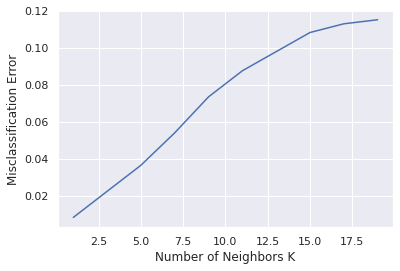

In [76]:
# Plot misclassification error vs k (with k value on X-axis) using matplotli

import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

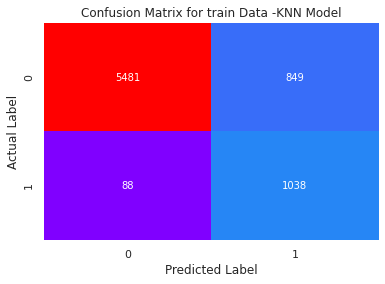

In [77]:
confusion_matrix(y_train,y_predict_train)
sns.heatmap(confusion_matrix(y_train,y_predict_train),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for train Data -KNN Model')
plt.show()

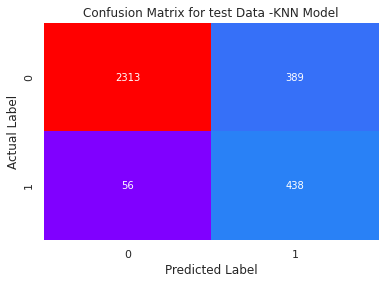

In [78]:
confusion_matrix(y_test,y_predict_test)
sns.heatmap(confusion_matrix(y_test,y_predict_test),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for test Data -KNN Model')
plt.show()

No handles with labels found to put in legend.


AUC: 1.000


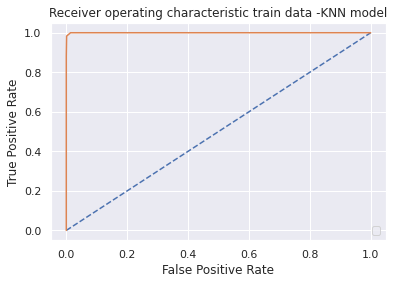

In [79]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % train_auc)
# calculate roc curve
train_fpr,train_tpr,train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic train data -KNN model')
plt.legend(loc="lower right")
plt.savefig('KNN Model-ROC')
plt.show()

No handles with labels found to put in legend.


AUC: 0.989


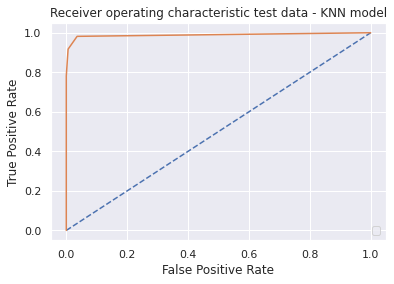

In [80]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
# calculate roc curve
test_fpr,test_tpr,test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic test data - KNN model')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()